# Predicting the Sale Price of Bulldozers<br>using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dir_path = r'..\data\bluebook-for-bulldozers\bluebook-for-bulldozers'
df = pd.read_csv(os.path.join(dir_path,'TrainAndValid.csv'), low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()[:10]

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
dtype: int64

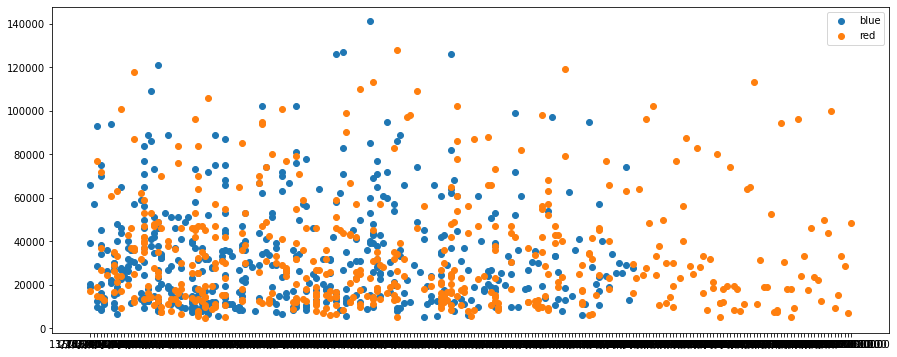

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df['saledate'][:500], df['SalePrice'][:500]);
ax.scatter(df['saledate'][500:1000], df['SalePrice'][500:1000])
ax.legend(['blue','red']);

## Parsing dates
- parse() method parses a string representation of a date

we work with time series data, we want to enrich the time & date component as much as possible.

In [6]:
df = pd.read_csv(os.path.join(dir_path,'TrainAndValid.csv'), low_memory=False, parse_dates=['saledate'])
df['saledate'].dtype

dtype('<M8[ns]')

In [7]:
df['saledate'].head(10).sort_values()

2   2004-02-26
1   2004-03-26
6   2004-08-26
7   2005-11-17
0   2006-11-16
9   2007-08-09
5   2008-12-18
4   2009-07-23
8   2009-08-27
3   2011-05-19
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [8]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
#  Make a copy for backup our original data
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [10]:
df_tmp['saleYear']  = df_tmp['saledate'].dt.year
df_tmp['saleMonth']  = df_tmp['saledate'].dt.month 
df_tmp['saleDay']  = df_tmp['saledate'].dt.day 
df_tmp['saleDayofWeek']  = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayofYear']  = df_tmp['saledate'].dt.dayofyear 

In [11]:
# Now we enriched our dataframe with datatime features , we can remove saledate
df_tmp.drop('saledate', axis=1, inplace=True)

### Convert String to Categories (number)

In [12]:
for label, content in df_tmp.items(): #column name and value(all rows)
    if pd.api.types.is_string_dtype(content) :
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [13]:
df_tmp.dtypes[:10]

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
dtype: object

In [14]:
df_tmp['state'].cat.categories[:10]

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia'],
      dtype='object')

In [15]:
df_tmp['state'].cat.codes[:10]

205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
dtype: int8

> Now we access all of data in form of number <br>
.. but we still have missing data

In [16]:
df_tmp.isna().sum()[:10]

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
dtype: int64

### Fill missing value

In [17]:
# numeric first
for label, content in df_tmp.items() :
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() :
            # add True, False colums if data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # fill missing numerical value with median
            df_tmp[label] = content.fillna(content.median())

In [18]:
# with catergorical value
for label, content in df_tmp.items() :
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # turn categories into number (add+1 because when null value is -1 
        # (i don't want it) then we trun it to 0)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [19]:
df_tmp.isna().sum()[::10]

SalesID                       0
fiBaseModel                   0
Enclosure                     0
Engine_Horsepower             0
Hydraulics_Flow               0
Differential_Type             0
fiModelDesc_is_missing        0
Drive_System_is_missing       0
Enclosure_Type_is_missing     0
Grouser_Tracks_is_missing     0
Travel_Controls_is_missing    0
dtype: int64

In [21]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

### Split data into training and validation.

In [23]:
df_train = df_tmp[df_tmp.saleYear != 2012]
df_val = df_tmp[df_tmp.saleYear == 2012]
len(df_train) , len(df_val)

(401125, 11573)

In [25]:
#Split into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

### Building an evaluation function
uses RMSLE : root mean square log error

In [30]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    calculate root mean square log error between predictions 
    and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model, X_train, X_valid, y_train, y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Train MAE': mean_absolute_error(y_train, train_preds),
            'Valid MAE': mean_absolute_error(y_valid, val_preds),
            'Training RMSLE': rmsle(y_train, train_preds),
            'Valid RMSLE': rmsle(y_valid, val_preds),
            'Training R^2': r2_score(y_train, train_preds),
            'Valid R^2': r2_score(y_valid, val_preds)}

    return scores

## Modeling
now all data is numeric and has no missing value. we should ve able to build a model.

training our model on a subset to tune the hyperparameter<br>
by change `max_samples` parameter in RandomForestRegression.

In [36]:
# because if we train all set will take a lot of time.
len(X_train)

401125

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [38]:
show_scores(model,X_train,X_valid,y_train,y_valid)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning 

In [46]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': np.arange(10,120,10),
    'max_depth':[None,3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':[0.5, 1, 'sqrt', 'auto'],
    'max_samples':[10000,20000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                            params, n_iter=2, cv=5, verbose=0)
rs_model.fit(X_train, y_train);

> i have try n_iter and best_params is under code box

In [45]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [49]:
# Train all data with hyperparameter
rdf_model = RandomForestRegressor(n_estimators=10, min_samples_leaf=1,min_samples_split=6,max_features='auto',max_depth=None, max_samples=None)
rdf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=6, n_estimators=10)

In [50]:
show_scores(rdf_model,X_train,X_valid,y_train,y_valid)

{'Train MAE': 2198.008497809095,
 'Valid MAE': 6332.6132967406575,
 'Training RMSLE': 0.11515333159361235,
 'Valid RMSLE': 0.26356090616276723,
 'Training R^2': 0.9745100247655399,
 'Valid R^2': 0.8635971361671265}

> that's better model

## Let's make prediction on Test data
on the testing set doesn't have labels.

In [62]:
test_df = pd.read_csv(os.path.join(dir_path,'Test.csv'),low_memory=False, parse_dates=['saledate'])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


but we must prepared our data before make prediction.<br>
like we did on a Training and Validation set.

### Preprocessing the data

In [54]:
def preprocess_data(df):
    """
    Preform transformations on df and return transformed df
    """
    df['saleYear']  = df['saledate'].dt.year
    df['saleMonth']  = df['saledate'].dt.month 
    df['saleDay']  = df['saledate'].dt.day 
    df['saleDayofWeek']  = df['saledate'].dt.dayofweek
    df['saleDayofYear']  = df['saledate'].dt.dayofyear  

    df.drop('saledate', axis=1, inplace=True)

    for label, content in df.items(): #column name and value(all rows)
        if pd.api.types.is_string_dtype(content) :
            df[label] = content.astype('category').cat.as_ordered()

    # numeric first
    for label, content in df.items() :
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum() :
                # add True, False colums if data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # fill missing numerical value with median
                df[label] = content.fillna(content.median())

    # with catergorical value
    for label, content in df.items() :
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # turn categories into number (add+1 because when null value is -1 
            # (i don't want it) then we trun it to 0)
            df[label] = pd.Categorical(content).codes + 1


    return df

In [63]:
test_df = preprocess_data(test_df)
test_df.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True


In [67]:
X_train.shape[1]

102

In [66]:
test_df.shape[1]

101

> testing set has different with training ...
<br>find something missing.

In [68]:
set(X_train.columns) - set(test_df.columns)

{'auctioneerID_is_missing'}

Manually adjust testing set to have auctioneerID_is_missing column:

In [69]:
test_df['auctioneerID_is_missing'] = False
test_df.shape[1]

102

Now our test dataframe has the same shape with train let's make predictions.

wait but the order of columns is't the same as Training set.

In [80]:
list(X_train.columns) == list(test_df.columns)

False

In [104]:
X_train.columns.get_loc('auctioneerID_is_missing')

56

In [106]:
test_df.columns.get_loc('auctioneerID_is_missing')

101

In [110]:
test_df.drop('auctioneerID_is_missing', axis=1, inplace=True)
test_df.insert(56, 'auctioneerID_is_missing', False ) # insert all False value

In [117]:
test_df.columns.tolist() == X_train.columns.tolist()

True

alright everything look well let's make predictions.

In [119]:
test_preds = rdf_model.predict(test_df)
test_preds[:10]

array([22959.16666667, 20801.66666667, 46993.33333333, 87091.26984127,
       51789.16666667, 30424.38492063, 27337.08333333, 12244.49675325,
       17270.6547619 , 47927.63528139])

### Format prediction into the same format Kaggle is after

In [120]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = test_df['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head(10)

,SalesID,SalesPrice
0,1227829,22959.166667
1,1227844,20801.666667
2,1227847,46993.333333
3,1227848,87091.269841
4,1227863,51789.166667
5,1227870,30424.384921
6,1227871,27337.083333
7,1227879,12244.496753
8,1227880,17270.654762
9,1227881,47927.635281


### Export Prediction data

In [121]:
df_preds.to_csv(os.path.join(dir_path,'Predictions.csv'), index=False)

### Future Importance

In [124]:
rdf_model.feature_importances_.shape

(102,)

In [140]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        'features':columns,
        'feature_importance': importances
    })).sort_values('feature_importance', ascending=False).reset_index(drop=True)

    #plot the dataframe
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(df['features'][:n], df['feature_importance'][:n], color=['salmon','lightblue'])
    ax.set_xlabel('features_importance')
    ax.set_ylabel('features')
    ax.invert_yaxis()

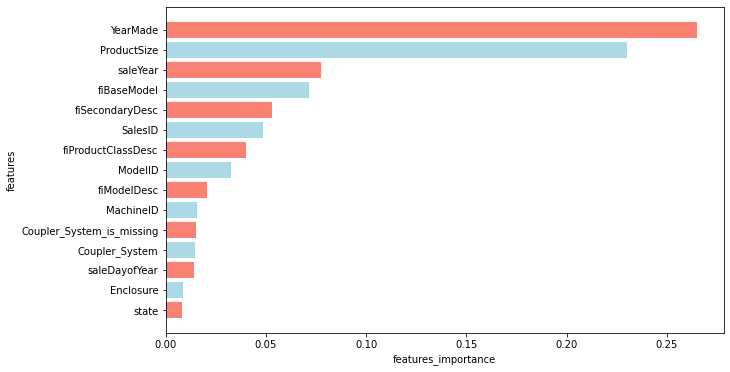

In [141]:
plot_features(X_train.columns, rdf_model.feature_importances_,15)

that's it!